In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# !pip install matplotlib

In [3]:
path = 'C:\\Users\\piyus\\Desktop\\datasets_for_anjuman\\data\\train\\'
test_path = 'C:\\Users\\piyus\\Desktop\\datasets_for_anjuman\\data\\test\\'
val_path = 'C:\\Users\\piyus\\Desktop\\datasets_for_anjuman\\data\\val\\'

In [4]:
os.listdir(path)


['NORMAL', 'PNEUMONIA', 'TUBERCULOSIS', 'UNKNOWN']

In [5]:
os.listdir(test_path)

['NORMAL', 'PNEUMONIA', 'TUBERCULOSIS', 'UNKNOWN']

In [6]:
os.listdir(val_path)

['NORMAL', 'PNEUMONIA', 'TUBERCULOSIS', 'UNKNOWN']

In [7]:
for list in os.listdir(path):
    print(os.listdir(path + list)) 

['CHNCXR_0002_0.png', 'CHNCXR_0003_0.png', 'CHNCXR_0004_0.png', 'CHNCXR_0005_0.png', 'CHNCXR_0006_0.png', 'CHNCXR_0007_0.png', 'CHNCXR_0008_0.png', 'CHNCXR_0009_0.png', 'CHNCXR_0010_0.png', 'CHNCXR_0011_0.png', 'CHNCXR_0012_0.png', 'CHNCXR_0013_0.png', 'CHNCXR_0014_0.png', 'CHNCXR_0016_0.png', 'CHNCXR_0017_0.png', 'CHNCXR_0018_0.png', 'CHNCXR_0019_0.png', 'CHNCXR_0020_0.png', 'CHNCXR_0021_0.png', 'CHNCXR_0022_0.png', 'CHNCXR_0023_0.png', 'CHNCXR_0025_0.png', 'CHNCXR_0026_0.png', 'CHNCXR_0028_0.png', 'CHNCXR_0030_0.png', 'CHNCXR_0031_0.png', 'CHNCXR_0032_0.png', 'CHNCXR_0033_0.png', 'CHNCXR_0034_0.png', 'CHNCXR_0035_0.png', 'CHNCXR_0036_0.png', 'CHNCXR_0037_0.png', 'CHNCXR_0038_0.png', 'CHNCXR_0039_0.png', 'CHNCXR_0041_0.png', 'CHNCXR_0042_0.png', 'CHNCXR_0043_0.png', 'CHNCXR_0044_0.png', 'CHNCXR_0045_0.png', 'CHNCXR_0046_0.png', 'CHNCXR_0047_0.png', 'CHNCXR_0048_0.png', 'CHNCXR_0050_0.png', 'CHNCXR_0052_0.png', 'CHNCXR_0053_0.png', 'CHNCXR_0054_0.png', 'CHNCXR_0055_0.png', 'CHNCXR_0056

In [8]:
data = tf.keras.utils.image_dataset_from_directory(path)
test_data = tf.keras.utils.image_dataset_from_directory(test_path)
val_data = tf.keras.utils.image_dataset_from_directory(val_path)

Found 13028 files belonging to 4 classes.
Found 1527 files belonging to 4 classes.
Found 761 files belonging to 4 classes.


In [9]:
data_iterator = data.as_numpy_iterator()
test_data_iterator = test_data.as_numpy_iterator()
val_data_iterator = val_data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()
test_batch = test_data_iterator.next()
val_batch = val_data_iterator.next()

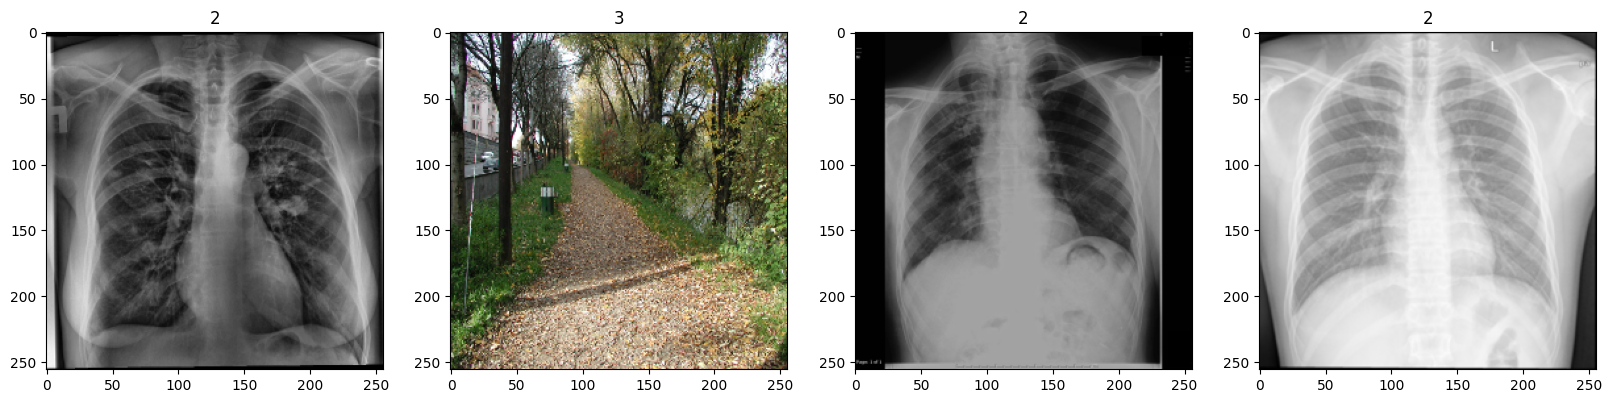

In [11]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x, y :(x/255,y))
test_data = test_data.map(lambda x, y :(x/255,y))
val_data = val_data.map(lambda x, y :(x/255,y))

In [13]:
data_iterator = data.as_numpy_iterator()
test_data_iterator = test_data.as_numpy_iterator()
val_data_iterator = val_data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()
test_batch = test_data_iterator.next()
val_batch = val_data_iterator.next()

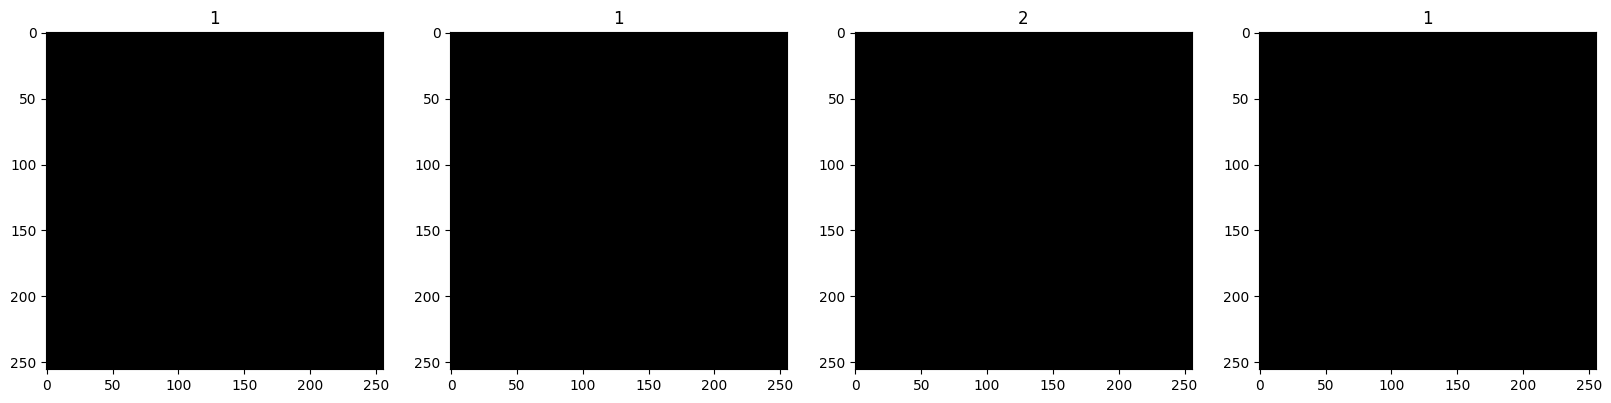

In [15]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

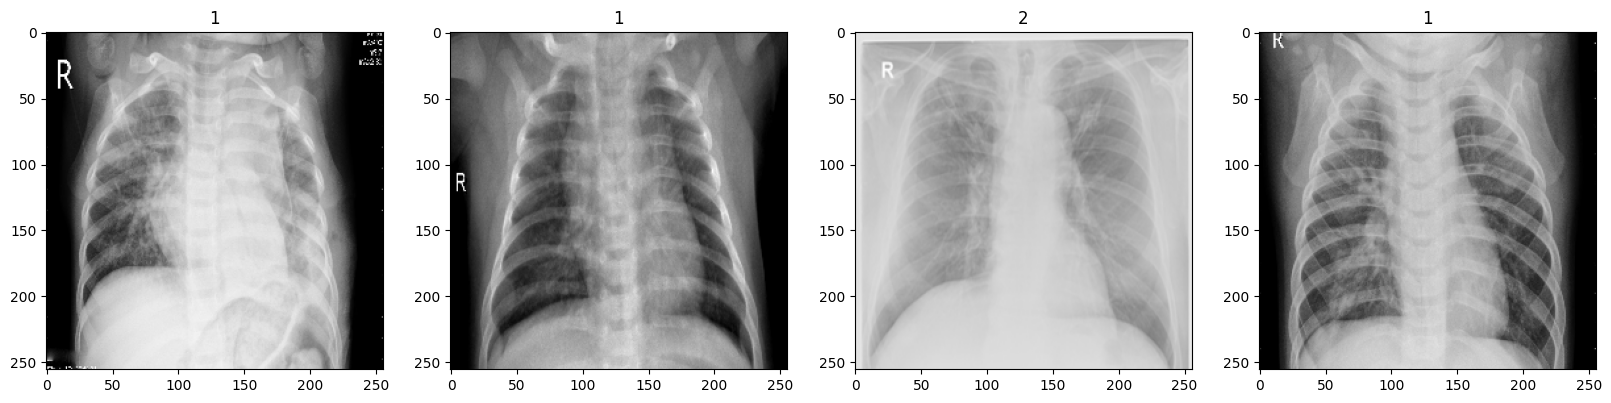

In [16]:
#to figure the labels

fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [17]:
data = data.shuffle(buffer_size=len(data))
test_data = test_data.shuffle(buffer_size=len(data))
val_data = val_data.shuffle(buffer_size=len(data))

In [18]:
len(data)
train_data = data

In [19]:
len(test_data)

48

In [20]:
len(val_data)

24

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),  # Adjust input_shape
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 3 classes (0, 1, 2,3)
])


In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    14,745,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,802,244 (56.47 MB)

 Trainable params: 14,802,244 (56.47 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(train_data, epochs=10,validation_data=val_data)

Epoch 1/10


408/408 ━━━━━━━━━━━━━━━━━━━━ 316s 616ms/step - accuracy: 0.7303 - loss: 0.6940 - val_accuracy: 0.9185 - val_loss: 0.2824
Epoch 2/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 299s 537ms/step - accuracy: 0.9167 - loss: 0.2119 - val_accuracy: 0.9067 - val_loss: 0.3384
Epoch 3/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 313s 656ms/step - accuracy: 0.9344 - loss: 0.1765 - val_accuracy: 0.9356 - val_loss: 0.1601
Epoch 4/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 357s 605ms/step - accuracy: 0.9623 - loss: 0.1004 - val_accuracy: 0.9330 - val_loss: 0.2698
Epoch 5/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 312s 544ms/step - accuracy: 0.9710 - loss: 0.0737 - val_accuracy: 0.9501 - val_loss: 0.1475
Epoch 6/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 297s 618ms/step - accuracy: 0.9788 - loss: 0.0572 - val_accuracy: 0.9448 - val_loss: 0.1807
Epoch 7/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 314s 603ms/step - accuracy: 0.9851 - loss: 0.0386 - val_accuracy: 0.9461 - val_loss: 0.2078
Epoch 8/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 252s 541ms/step - accuracy: 0.9524 - loss: 0.15

In [30]:
model.save('tb_pnemo.h5')
model.save('tb_pnemo.keras')

In [31]:
# model = tf.keras.models.load_model('is_leaf.h5')

In [34]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
basicsr 1.4.2 requires addict, which is not installed.
basicsr 1.4.2 requires lmdb, which is not installed.
basicsr 1.4.2 requires pyyaml, which is not installed.
basicsr 1.4.2 requires scikit-image, which is not installed.
basicsr 1.4.2 requires torch>=1.7, which is not installed.
basicsr 1.4.2 requires torchvision, which is not installed.
basicsr 1.4.2 requires tqdm, which is not installed.
basicsr 1.4.2 requires yapf, which is not installed.
facexlib 0.3.0 requires numba, which is not installed.
facexlib 0.3.0 requires torch, which is not installed.
facexlib 0.3.0 requires torchvision, which is not installed.
facexlib 0.3.0 requires tqdm, which is not installed.
gfpgan 1.3.8 requires lmdb, which is not installed.
gfpgan 1.3.8 requires pyyaml, which is not installed.
gfpgan 1.3.8 requires torch>=1.7, which is no

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


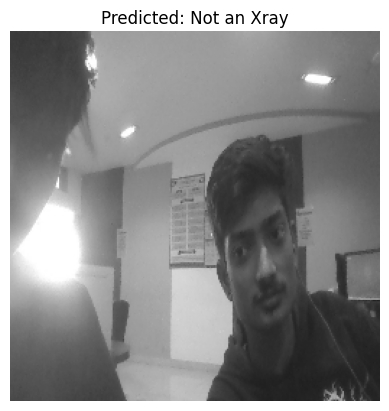

Normal: 0.0000
Pnemonia: 0.0000
Tuberculosis: 0.0000
Not an Xray: 1.0000


In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load your trained model
# model = tf.keras.models.load_model("your_model.h5")  # Update the filename if needed

# Class labels (adjust based on your dataset)
class_labels = ["Normal", "Pnemonia", "Tuberculosis", "Not an Xray"]  # Update these with actual class names

# Function to preprocess and predict image
def predict_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))  # Resize to match model input
    img_array = np.expand_dims(img, axis=0) / 255.0  # Normalize

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get class with highest probability

    # Plot the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.axis("off")
    plt.show()

    # Print probabilities
    for i, label in enumerate(class_labels):
        print(f"{label}: {predictions[0][i]:.4f}")

# Test with an image
image_path = "C:\\Users\\piyus\\Desktop\\karm_m\\backend\\tb_pnemo\\bw_mukesh.jpg"
predict_image(image_path)
